In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings


from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

아나콘다 프롬프트에서 
pip install geopandas 해주셔야 아래 geopandas 가 import 됩니다.

In [1]:
import geopandas as gpd 

In [6]:
#전국 차량 충전기 현황 
charge_df = pd.read_csv('charge_num.csv') 

In [7]:
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 

kr_sido = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido=kr_sido.merge(charge_df,on='location')

In [8]:
#전국 충전기 그래프를 위한 데이터프레임 입니다. 
kr_sido

,location,geometry,급속충전기(대),완속충전기(대)
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",581,946
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",205,211
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",259,402
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",202,301
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",120,132
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",170,182
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",72,67
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",87,133
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",862,1395
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",259,209


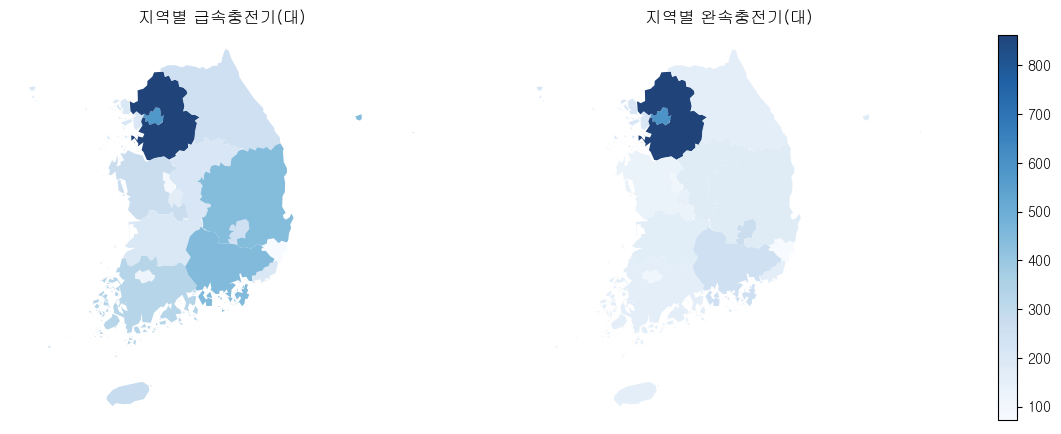

In [9]:
fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(15,10))

kr_sido.plot(ax=ax[0],column="급속충전기(대)",cmap="Blues",legend=False, alpha=0.9)
kr_sido.plot(ax=ax[1],column="완속충전기(대)",cmap="Blues",legend=False, alpha=0.9)

ax[0].set_title('지역별 급속충전기(대)')
ax[1].set_title('지역별 완속충전기(대)')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();